
#Install necessary modules

https://fireducks-dev.github.io/docs/get-started/

Copy and paste the content above into the cell.
Run the cell with %%writefile requirements.txt.
Run !pip install -r requirements.txt to install all the specified libraries and their versions.

In [1]:
!pip install openpyxl
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 20.0.0 which is incompatible.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 20.0.0 which is incompatible.


In [2]:
%load_ext fireducks.pandas
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns


#Data Load

In [3]:
#!wget command to download file from cloud location
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip


--2025-06-16 22:43:37--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [     <=>            ]  22.62M  23.8MB/s    in 0.9s    

2025-06-16 22:43:39 (23.8 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode' :'string', 'Description': 'string', 'Country': 'string'})
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Exploration

In [6]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df1.info()

<class 'fireducks.pandas.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [8]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Check categorical columns for misspelling, ambiguous categories, inconsistent formats
df1.describe(include='string')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


#Data Cleaning

## 1.Handling Missing values:
* Drop rows where CustomerID is missing
* Fill missing Description values with actual values that have same StockCode

### Identified problems:
###1. CustomerID has 135080 missing values
###   Description	has 1454 missing values

###2. Negative value for Quantity column (min	-80995.000000)
###   Negative value for UnitPrice column (min -11062.060000)


###1. Ignore CustomerID with null entries since it is not used in analysis
### 2. Fill missing Description values

In [10]:
df1[df1["CustomerID"].isna()].head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


* Fill missing Description values

In [11]:
# Create df with most occuring Description Values for StockCode values
most_frequent = df1[["StockCode", "Description"]].value_counts().reset_index()
most_frequent = most_frequent.groupby("StockCode").head(1)
most_frequent.columns = ["StockCode", "Frequent Description", "Count"]
most_frequent.head(5)

,StockCode,Frequent Description,Count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [12]:
df2 = df1.merge(most_frequent, on="StockCode", how="left")
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Frequent Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449


In [13]:
# Replace all missing Description values in df1 for most
# frequent Description values with same StockCode

In [14]:
df2['Description'] = df2['Frequent Description']
df2.isnull().sum()

InvoiceNo                    0
StockCode                    0
Description                112
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID              135080
Country                      0
Frequent Description       112
Count                      112
dtype: int64

In [15]:
df2.dropna(subset="Description", inplace=True)

In [16]:
df2.drop(columns = ["Frequent Description", "Count"], inplace=True)

In [17]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134968
Country             0
dtype: int64

In [18]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,541797.000000,541797.000000,406829.000000
mean,9.555919,4.612067,15287.690570
std,218.103428,96.769831,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 2.Handling negative values for Quantityc and Price


In [19]:
df2[df2["Quantity"]<0].head(5)
df2[df2["UnitPrice"]<0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
df3 = df2[(df2.Quantity>0) & (df2.UnitPrice>0)]
df3.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Feature Engineering

## Create required columns for Trend Analysis and Churn Analysis

### Monthly Sales Analysis
###Required Columns:
* **Total Price** = Quantity * UnitPrice**
* **Month** - extract month from Invoice column

In [21]:
df4 = df3.copy()
#Calculate Total Price for each Transaction
df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df4.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.6+ MB


In [23]:
#Extract Month from InvoiceDate
df4['Month'] = df4['InvoiceDate'].dt.month
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


# Data Visualization


## Plot Monthly Sales


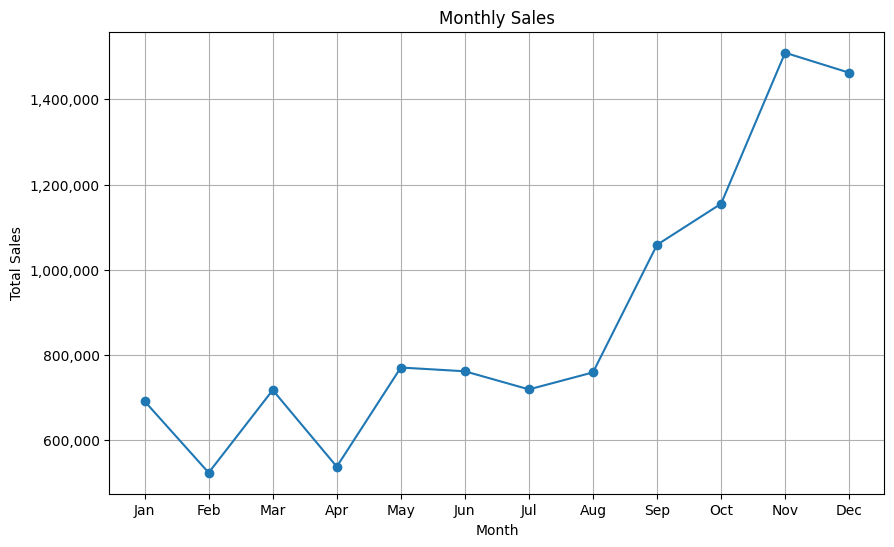

In [24]:
import matplotlib.ticker as mticker

monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
monthly_sales.plot(kind='line', ax=ax, title='Monthly Sales', marker='o')
formatter = mticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Map month numbers to names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

ax.set_xticks(monthly_sales.index)
ax.set_xticklabels([month_names[month] for month in monthly_sales.index])
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### **Key Conclusions from Monthly Sales**
**Seasonal Trends**: Sales dip early in the year (Feb-Apr), stabilize mid-year (May-Aug), and peak sharply in the last quarter (Sep-Nov), before a slight decline in Dec.

**Peak Sales Period**: The highest sales occur in Nov, reaching around 1,500,000, indicating a strong holiday shopping season.

**Low Sales Period**: The lowest sales are in Feb-Apr, around 600,000, suggesting a post-holiday slump.

**Overall Growth:** Despite fluctuations, there’s a general upward trend toward the end of the year, showing potential for annual growth.

##Product-wise Sales

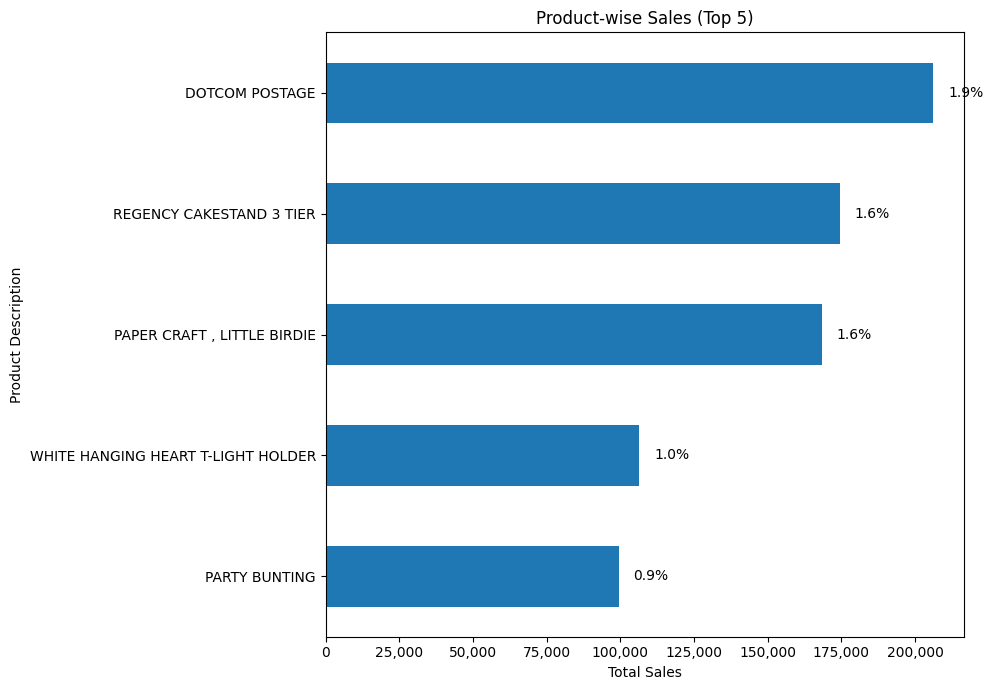

In [25]:
product_wise_sales = df4.groupby('Description')['TotalPrice'].sum()
total_sales = df4['TotalPrice'].sum()
product_wise_sales = product_wise_sales.sort_values(ascending=False)
top_products_for_plot = product_wise_sales.nlargest(5)

fig, ax = plt.subplots(figsize=(10, 7))
top_products_for_plot.plot(kind='barh', ax=ax, title='Product-wise Sales (Top 5)')
formatter = mticker.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

for i, (product, sales) in enumerate(top_products_for_plot.items()):
    percentage = (sales / total_sales) * 100
    ax.text(sales + 5000, i, f'{percentage:.1f}%', va='center')


ax.invert_yaxis()

plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

###**Key Conclusions:**

**Low Product Dominance:** The top product, Dotcom Postage, accounts for only 1.9% of total sales, and the others are even lower (down to 0.9%). This suggests that no single product dominates the sales portfolio, indicating a highly diversified product range where sales are spread across many items.

**Close Performance Among Top Products:** The top three products have relatively close sales percentages (1.9% to 1.6%), showing similar levels of popularity

**Potential Inventory or Marketing Issues:** The low percentages (all under 2%) could imply either a lack of standout products that drive significant sales or an overly broad product catalog diluting focus. Alternatively, it might reflect a business model that relies on high-volume, low-margin sales across many products

##Country-wise Sales

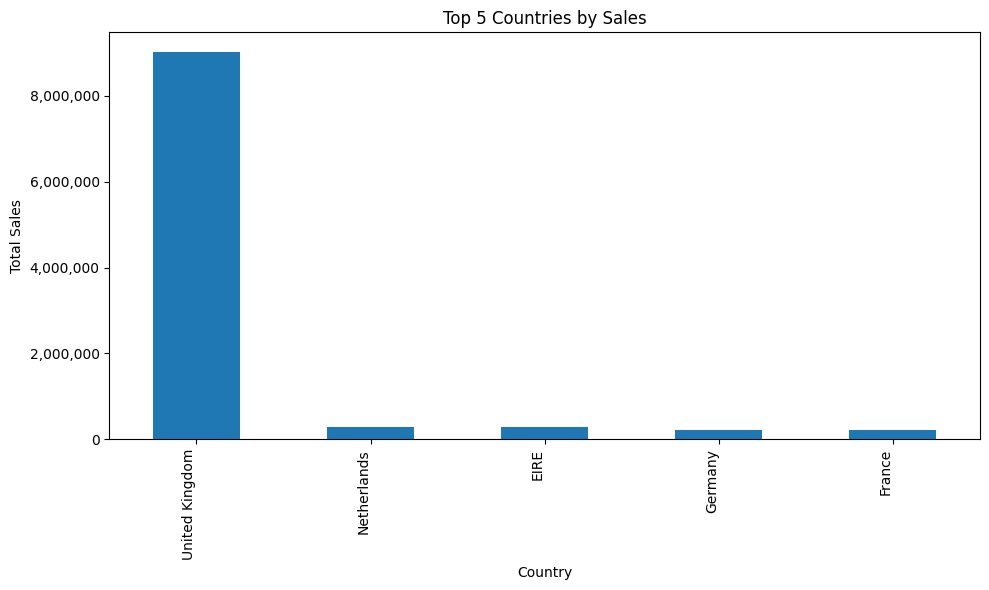

In [26]:
import matplotlib.ticker as mticker

top_countries = df4.groupby('Country')['TotalPrice'].sum().nlargest(5)
fig, ax = plt.subplots(figsize=(10, 6))
top_countries.plot(kind='bar', ax=ax, title='Top 5 Countries by Sales')
formatter = mticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90, ha='right')

plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

###Key Conclusions from Country-wise Sales:

**Market Concentration:** The United Kingdom is the overwhelmingly dominant market, accounting for the vast majority of sales. This suggests a heavy reliance on the UK for revenue, which could pose a risk if market conditions in the UK change.

**Underperforming Markets:** The other four countries (Netherlands, EIRE, Germany, France) have nearly equal but very low contributions to total sales

##RFM Analysis
###Purpose: customers are grouped into distinct segments based on their combined RFM scores, allowing for targeted marketing and customer relationship management strategies

In [27]:
current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

###1. <u>Calculating RFM Metrics </u>

Quantify each customer's behavior across three key dimensions: Recency, Frequency, and Monetary Value.

In [28]:
current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
# Exclude canceled orders
df5 = df4[~df4['InvoiceNo'].astype(str).str.startswith('C')]

# Calculate RFM metrics
rfm_df = df5.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (current_dt - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary'], inplace=True)

print("RFM Metrics Calculated and NaNs Dropped:")
print(rfm_df.head())

RFM Metrics Calculated and NaNs Dropped:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


###2. <u>Creating RFM Scores (from 1 to 4)</u>

Translate the raw RFM metrics into a standardized scoring system, higher scores indicate better customer engagement or value.
Function safe_qcut that uses quantile-based binning after ranking the data. It handles potential tied values in the RFM metrics and assign scores consistently.


In [35]:
def safe_qcut(series, q, labels, ascending=True):
    # Rank the series to break ties, ensuring unique ranks
    ranked = series.rank(method='first', ascending=ascending)
    n_unique = ranked.nunique()
    actual_q = min(q, n_unique)
    adjusted_labels = labels[:actual_q]
    return pd.qcut(ranked, q=actual_q, labels=adjusted_labels)

rfm_df['R_Score'] = safe_qcut(
    rfm_df['Recency'], 4,
    labels=[ 4, 3, 2, 1],
    ascending=True            # Lower recency = higher score
)

rfm_df['F_Score'] = safe_qcut(
    rfm_df['Frequency'], 4,
    labels=[1, 2, 3, 4],  # Higher frequency = higher score
    ascending=True
)

rfm_df['M_Score'] = safe_qcut(
    rfm_df['Monetary'], 4,
    labels=[1, 2, 3, 4],  # Higher monetary = higher score
    ascending=True
)

rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)
rfm_df['RFM_Sum'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']



In [30]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Sum
0,12346.0,326,1,77183.60,1,1,4,6
1,12347.0,2,7,4310.00,4,4,4,12
2,12348.0,75,4,1797.24,2,3,4,9
3,12349.0,19,1,1757.55,3,1,4,8
4,12350.0,310,1,334.40,1,1,2,4



###3. <u>Segmenting Customers based on RFM Sum </u>
The distribution of the 'RFM_Sum' is visualized using a histogram and KDE plot to understand the spread of combined scores.



###Customer segments based on following thresholds:

**High Value Customers:** RFM_Sum >= 10

**Medium Value Customers:** 7 <= RFM_Sum < 10


**Low Value Customers:** 4 <= RFM_Sum < 7

**Churn/Lost Customers:** RFM_Sum < 4

/usr/local/lib/python3.11/dist-packages/fireducks/pandas/generic.py:945: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(


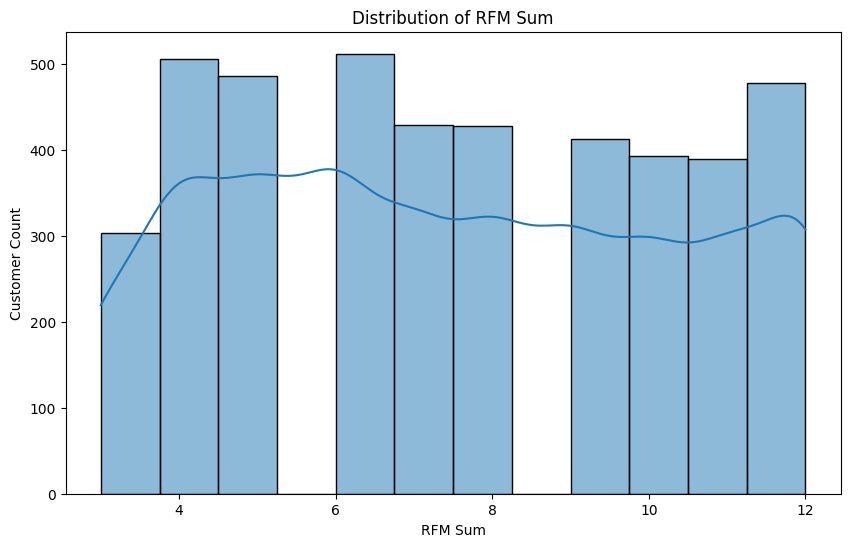


RFM Sum Descriptive Statistics:
count    4338.000000
mean        7.500000
std         2.823715
min         3.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: RFM_Sum, dtype: float64


<ipython-input-37-2378415384>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/usr/local/lib/python3.11/dist-packages/fireducks/pandas/generic.py:945: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(


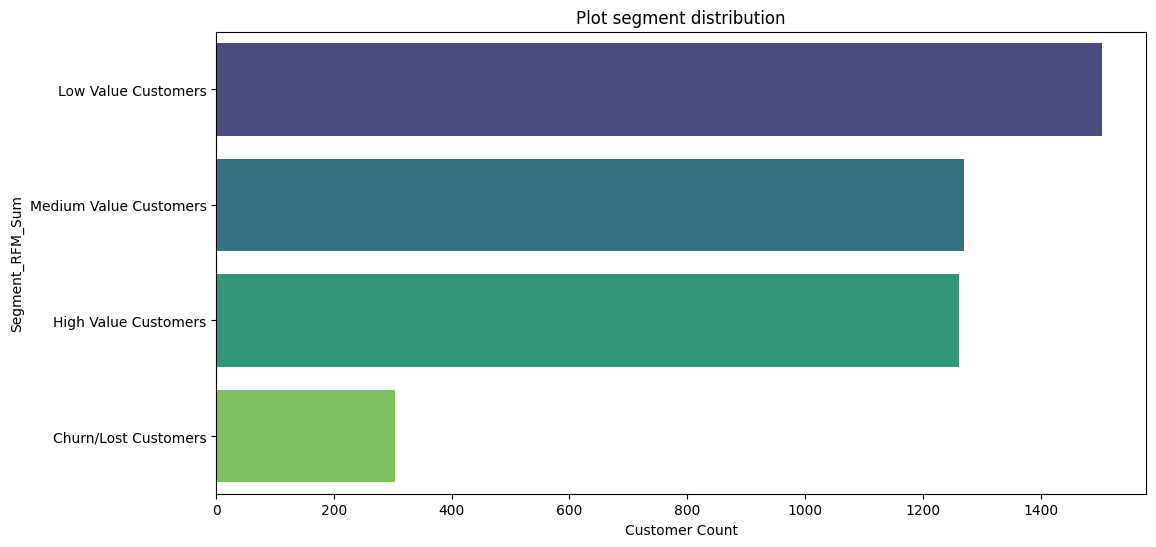

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['RFM_Sum'], kde=True, bins=12)
plt.title('Distribution of RFM Sum')
plt.xlabel('RFM Sum')
plt.ylabel('Customer Count')
plt.show()
print("\nRFM Sum Descriptive Statistics:")
print(rfm_df['RFM_Sum'].describe())

def assign_segment_by_rfm_sum(rfm_sum):
    if rfm_sum >= 10:
        return 'High Value Customers'
    elif 7 <= rfm_sum < 10:
        return 'Medium Value Customers'
    elif 4 <= rfm_sum < 7:
        return 'Low Value Customers'
    else:
        return 'Churn/Lost Customers'

# Apply the segmentation based on RFM Sum
rfm_df['Segment_RFM_Sum'] = rfm_df['RFM_Sum'].apply(assign_segment_by_rfm_sum)


plt.figure(figsize=(12, 6))
sns.countplot(
    data=rfm_df,
    y='Segment_RFM_Sum',
    order=rfm_df['Segment_RFM_Sum'].value_counts().index,
    palette='viridis'
)
plt.title('Plot segment distribution')
plt.xlabel('Customer Count')
plt.show()

In [32]:
rfm_df.sort_values(by='RFM_Sum', ascending=False).head(5)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Sum,Segment_RFM_Sum
1,12347.0,2,7,4310.00,4,4,4,12,High Value Customers
15,12362.0,3,10,5226.23,4,4,4,12,High Value Customers
34,12388.0,16,6,2780.66,4,4,4,12,High Value Customers
56,12417.0,3,9,3649.10,4,4,4,12,High Value Customers
61,12423.0,1,8,1859.31,4,4,4,12,High Value Customers


#Churn Analysis
* If Recency value is higher than 4, customers are more likely to leave you

## Find  **Churn Customers** - customers who didn't make purchase in the last 90 days

In [33]:

last_purchase_date = df4.groupby("CustomerID")['InvoiceDate'].max()
current_dt
last_purchase_date = (current_dt - last_purchase_date).dt.days
last_purchase_date

#Calculate 90 days from last purchase
days_since_last_purchase = 90
churn_customers = last_purchase_date[last_purchase_date > days_since_last_purchase]
churn_customers.head(5)

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64


### Plot Destribution  Density Plot (KDE) and the distribution of Recency for churned customers

/usr/local/lib/python3.11/dist-packages/fireducks/pandas/generic.py:945: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
<ipython-input-34-2946025087>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_customers, shade=True)
/usr/local/lib/python3.11/dist-packages/fireducks/pandas/generic.py:945: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(


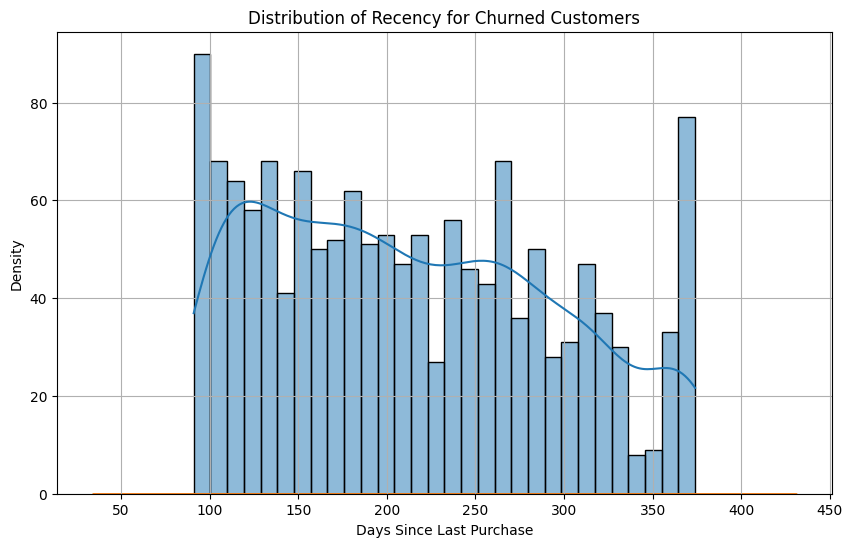

Number of Churned Customers: 1449


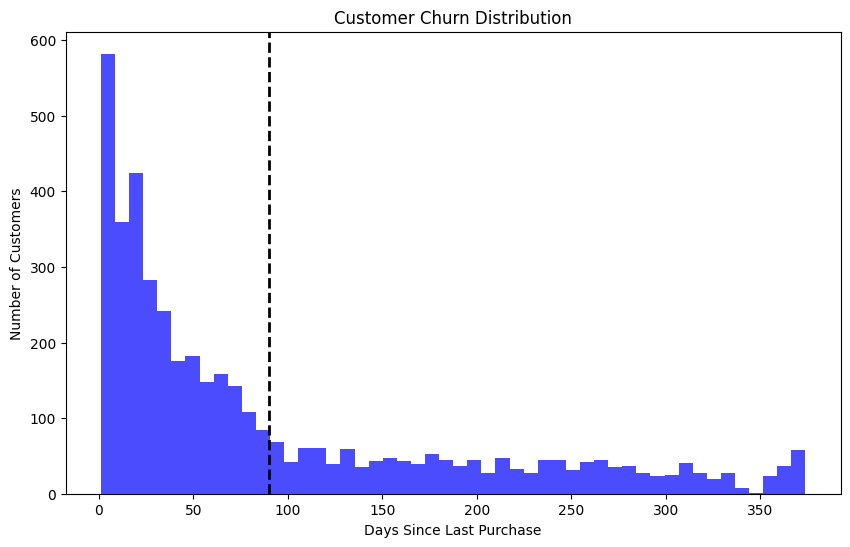

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(churn_customers, kde=True, bins=30)

sns.kdeplot(churn_customers, shade=True)

plt.title('Distribution of Recency for Churned Customers')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers' if 'histplot' in locals() else 'Density')
plt.grid(True)
plt.show()

print ("Number of Churned Customers:", len(churn_customers))
plt.figure(figsize=(10, 6))
plt.hist(last_purchase_date , bins=50, color='blue', alpha=0.7)
plt.axvline(days_since_last_purchase , color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt. xlabel( 'Days Since Last Purchase' )
plt.ylabel ( 'Number of Customers')
plt. show()